#**Big Mart Sales Prediction Using Linear Regression**






##**1).Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

##**2).Data Collection**

In [ ]:
big_mart_data = pd.read_csv('Train.csv')

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
big_mart_data.shape

(8523, 12)

In [ ]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [ ]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##**3).Data Cleaning**

Handling Missing Values

Mean --> average

Mode --> more repeated value

In [ ]:
# mean value of "Item_Weight" column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [ ]:
# filling the missing values in "Item_weight column" with "Mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

In [ ]:
# mode of "Outlet_Size" column
big_mart_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [ ]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [ ]:
mode_of_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
miss_values = big_mart_data['Outlet_Size'].isnull()

In [ ]:
miss_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [ ]:
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [ ]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

##**4).Data Analysis**

In [ ]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**(i).Numerical Features**

In [ ]:
sns.set()

<ipython-input-736-c7f8d7e0c8c3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


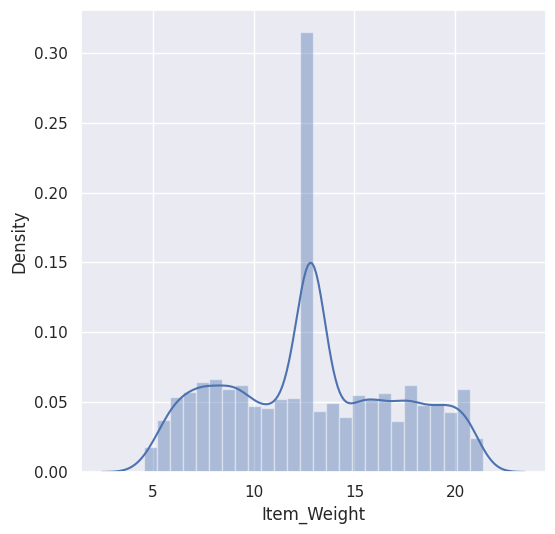

In [ ]:
# Item_Weight distribution

plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

<ipython-input-737-d8bd6a53f803>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


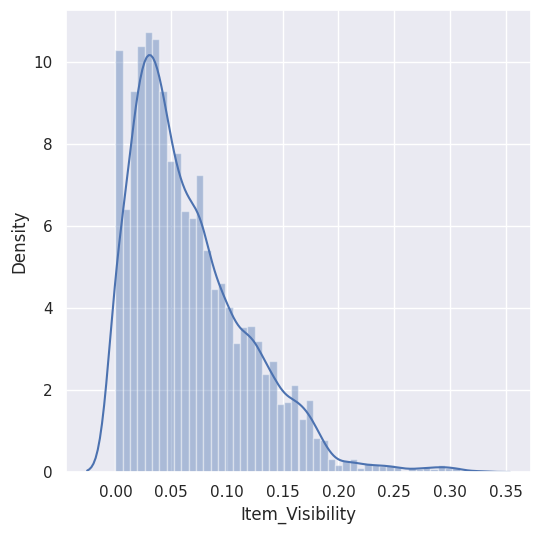

In [ ]:
# Item Visibility distribution

plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

<ipython-input-738-06cc7a65c5d3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


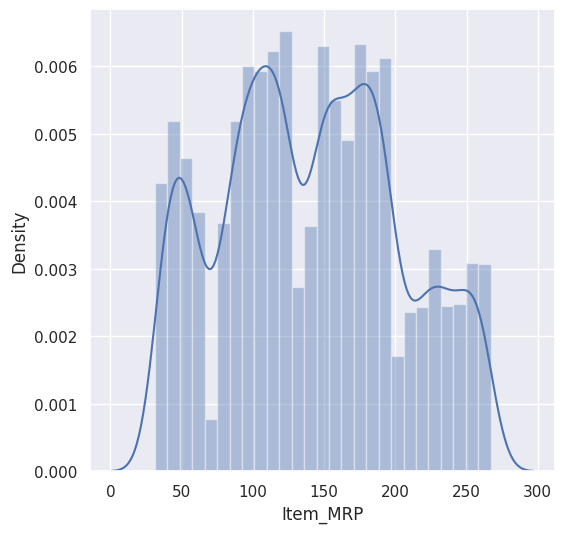

In [ ]:
# Item MRP distribution

plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

<ipython-input-739-faa72d409cf9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


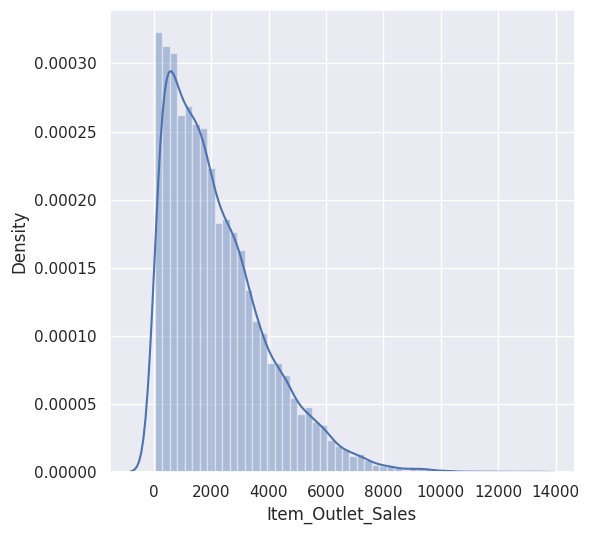

In [ ]:
# Item_Outlet_Sales distribution

plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

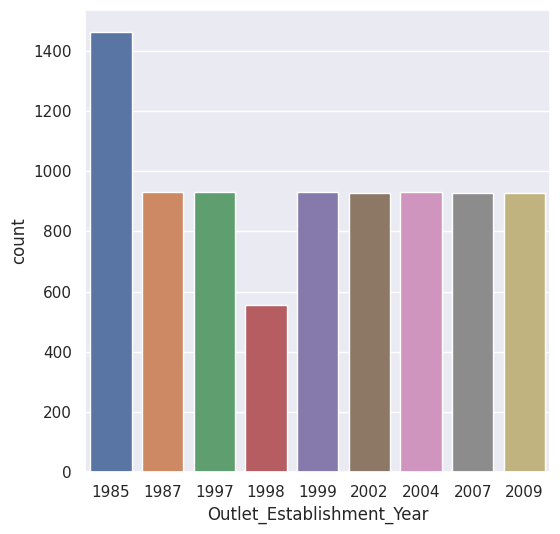

In [ ]:
# Outlet_Establishment_Year column

plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

**(ii).Categorical Features**

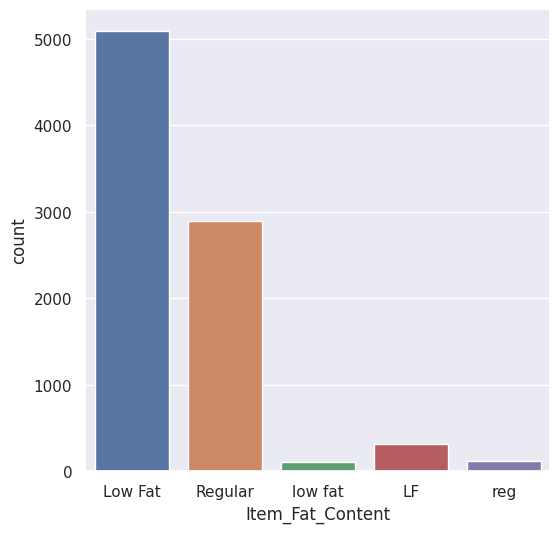

In [ ]:
# Item_Fat_Content column

plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

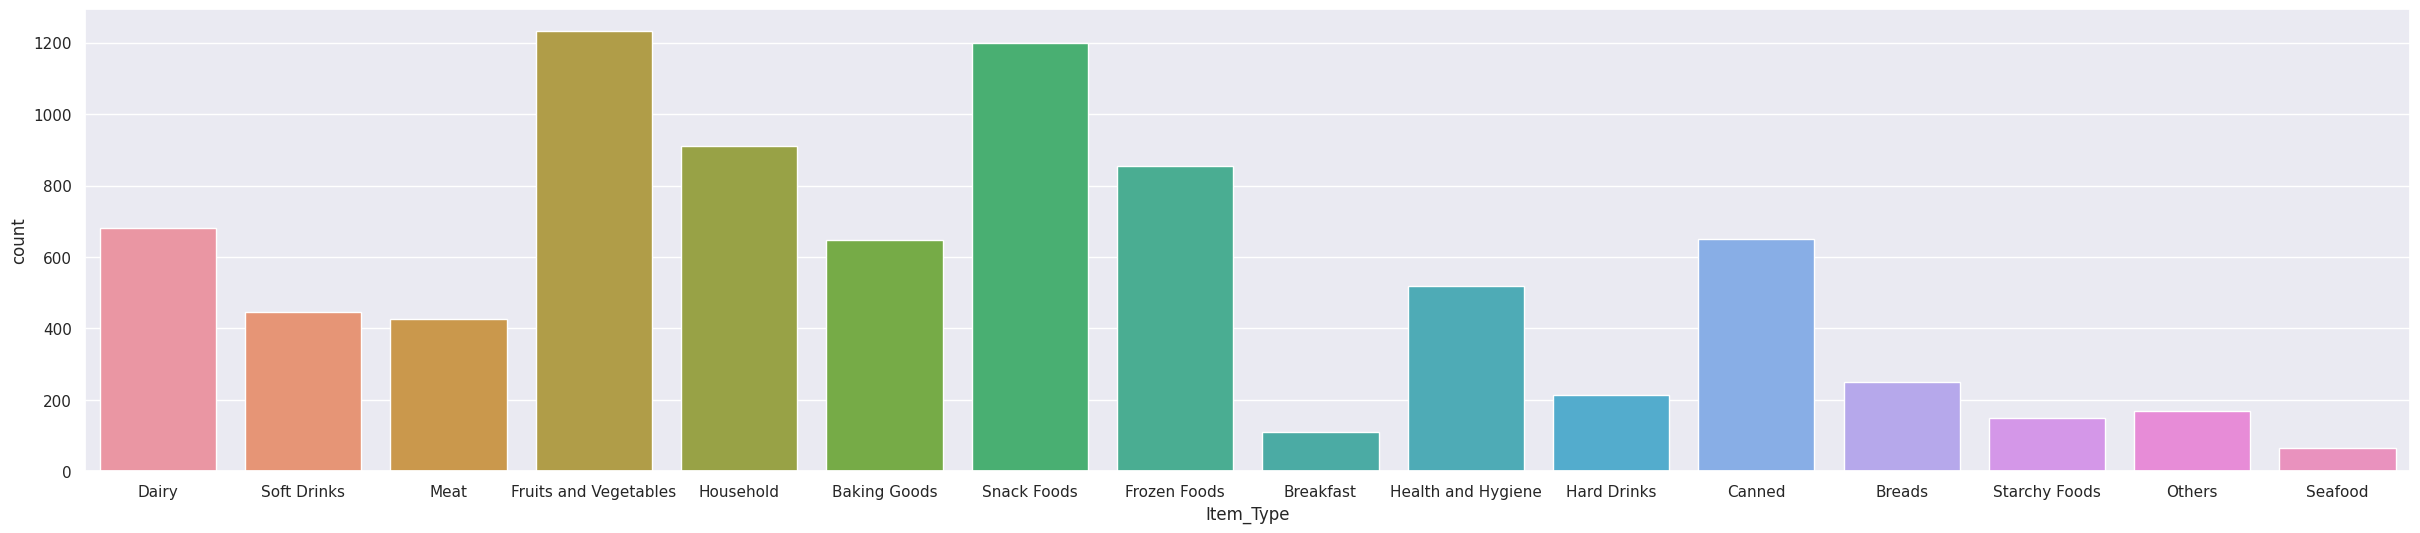

In [ ]:
# Item_Type column

plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

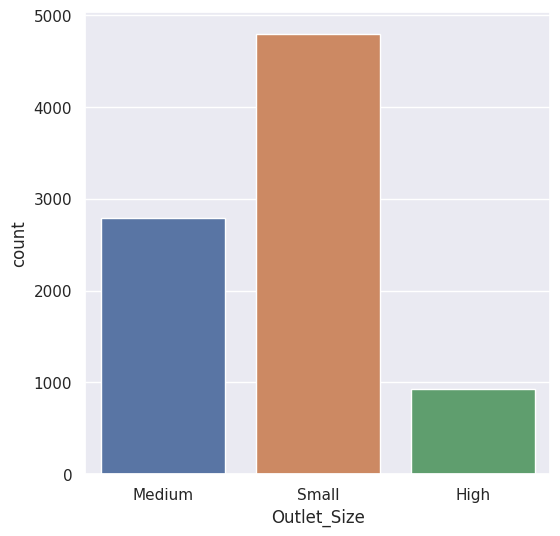

In [ ]:
# Outlet_Size column

plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()

##**5).Feature Engineering**

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
print("Before: ", "\n\n", big_mart_data['Item_Type' ].value_counts(), sep="")
big_mart_data[ 'Simplified_Item_Types'] = big_mart_data['Item_Identifier'].apply(lambda x: x[0:2])
print("\nAfter: ", "\n\n", big_mart_data['Simplified_Item_Types' ].value_counts(), sep="")

Before: 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

After: 

FD    6125
NC    1599
DR     799
Name: Simplified_Item_Types, dtype: int64


In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**(i).Label Encoding**

In [ ]:
encoder = LabelEncoder()

In [ ]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Simplified_Item_Types
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,FD
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,DR
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,FD
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800,FD
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,NC


In [ ]:
big_mart_data = pd.get_dummies(big_mart_data , columns = ['Item_Fat_Content' , 'Outlet_Location_Type' , 'Outlet_Type' , 'Outlet_Size' , 'Simplified_Item_Types'])
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Simplified_Item_Types_DR,Simplified_Item_Types_FD,Simplified_Item_Types_NC
0,156,9.30,0.016047,4,249.8092,9,1999,3735.1380,1,0,...,0,1,0,0,0,1,0,0,1,0
1,8,5.92,0.019278,14,48.2692,3,2009,443.4228,0,1,...,0,0,1,0,0,1,0,1,0,0
2,662,17.50,0.016760,10,141.6180,9,1999,2097.2700,1,0,...,0,1,0,0,0,1,0,0,1,0
3,1121,19.20,0.000000,6,182.0950,0,1998,732.3800,0,1,...,1,0,0,0,0,0,1,0,1,0
4,1297,8.93,0.000000,9,53.8614,1,1987,994.7052,1,0,...,0,1,0,0,1,0,0,0,0,1


In [ ]:
X = big_mart_data.drop(columns=['Item_Type','Item_Identifier','Outlet_Identifier'], axis=1)

# I drop the 'Item_Type' column because it is not useful for analysis
# 'Item_Identifier' and 'Outlet_Identifier' columns are string type, not used in  the model( Not considered for dependent columns )

**(ii).Splitting features and Target**

In [ ]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [ ]:
print(X)

      Item_Identifier  Item_Weight  Item_Visibility  Item_Type  Item_MRP  \
0                 156        9.300         0.016047          4  249.8092   
1                   8        5.920         0.019278         14   48.2692   
2                 662       17.500         0.016760         10  141.6180   
3                1121       19.200         0.000000          6  182.0950   
4                1297        8.930         0.000000          9   53.8614   
...               ...          ...              ...        ...       ...   
8518              370        6.865         0.056783         13  214.5218   
8519              897        8.380         0.046982          0  108.1570   
8520             1357       10.600         0.035186          8   85.1224   
8521              681        7.210         0.145221         13  103.1332   
8522               50       14.800         0.044878         14   75.4670   

      Outlet_Identifier  Outlet_Establishment_Year  Item_Fat_Content_0  \
0            

In [ ]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


**(iii).Splitting the data into Training data & Testing Data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 22) (6818, 22) (1705, 22)


##**(6). Applying Linear Regression**

In [ ]:
def plot_pred(y_true,y_pred,title):

  x_ax = range(len(y_true))
  plt.figure(figsize=(12,6))
  plt.plot(x_ax,y_true,label="Original")
  plt.plot(x_ax,y_pred,label="Predicted")
  plt.title(title)
  plt.ylabel("sales")
  plt.xlabel("Data")
  plt.legend(loc="best",fancybox=True,shadow=True)
  plt.grid(True)
  plt.show()

In [ ]:
def apply_models (model, X_train, x_test, y_train, y_test, iterations = 100):
  results = {}
  r2_train, r2_test, rmse_train, rmse_test = [], [], [], []

  for j in range(iterations):

    model.fit(X_train,Y_train)                                                        # implementing the model
    r2_test.append(r2_score(y_test, model.predict(x_test)))                           # calculating the R square score value for testing part
    r2_train.append(r2_score(y_train, model.predict(X_train)))                        # calculating the R square score value for training part
    rmse_test.append(np.sqrt(mean_squared_error(y_test, model.predict(x_test))))      # calculating the root mean square error value
    rmse_train.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))   # calculating the root mean square error value

  results[1] = [np.mean(r2_train), np.mean(r2_test), np.mean (rmse_train), np.mean(rmse_test)]
  plot_pred (y_train, model.predict (X_train),"Train Data Predictions")                  # calling function to plot the training part
  plot_pred (y_test, model.predict (x_test),"Test Data Predictions")                     # calling function to plot the test part

  return pd.DataFrame(results)

In [ ]:
def print_results (model, X_train, x_test,y_train,y_test):

  results = []                                                                        # List to store all the calculated values

  results.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))        # calculating the root mean square error value for 1
  results.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))          # calculating the root mean square error value for tes
  results.append(r2_score(y_train, model.predict (X_train)))                          # calculating the R square score value for training part
  results.append(r2_score(y_test, model. predict (x_test)))                           # calculating the R square score value for testing part

  results_df = pd.DataFrame (results)                                                 # converting the List into the dataframe
  results_df["Metric"] = ["RMSE Train", "RMSE Test","R2 Train","R2 Test"]

  plot_pred(y_train, model.predict (X_train),": Train Predictions")                   # calling function to plot the training part
  plot_pred(y_test, model.predict (x_test),": Test Predictions")                      # calling function to plot the test part

  print(results_df.head())

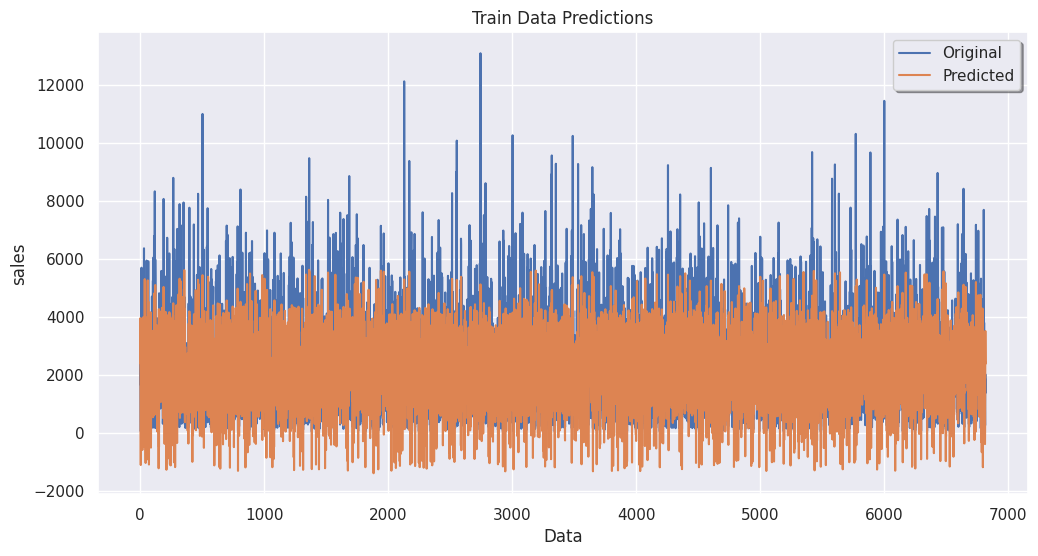

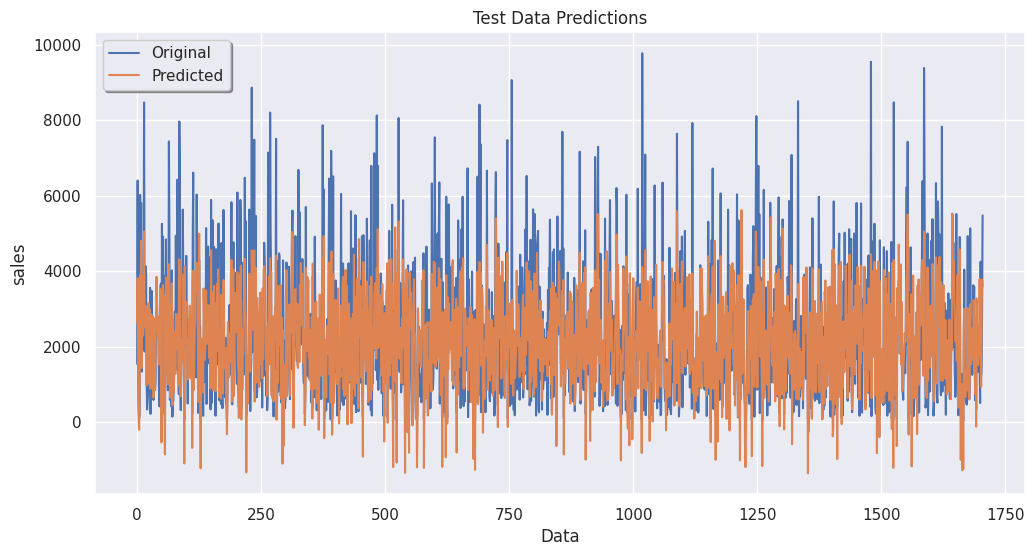

,1,Metric
0,0.567723,R2_train
1,0.546535,R2_test
2,1113.261669,RMSE_train
3,1183.164835,RMSE_test


In [ ]:
Model = LinearRegression()
results = apply_models(Model,X_train,X_test,Y_train,Y_test)
results["Metric"] = ["R2_train","R2_test","RMSE_train","RMSE_test"]
results.head()

In [ ]:
a = pd.DataFrame(Model.predict(X_train))
b = pd.DataFrame(Model.predict(X_test))

a['Predicted Train Data Sales'] = a
b['Predicted Test Data Sales'] = b

a = a.drop(0,axis=1)
b = b.drop(0,axis=1)

In [ ]:
a

,Predicted Train Data Sales
0,2395.052452
1,3063.986869
2,3955.912390
3,1436.032703
4,-1114.394251
...,...
6813,3063.031977
6814,3508.780645
6815,3036.717062
6816,2379.080913


In [ ]:
b

,Predicted Test Data Sales
0,2631.775420
1,3816.464026
2,1391.220390
3,63.654029
4,-202.520124
...,...
1700,3446.728536
1701,940.172425
1702,2781.049412
1703,3779.178052


#**STATEMENT**

**Data Source** : https://www.kaggle.com/datasets/aakash2016/big-mart-sales-dataset

**Libraries Used :** Numpy , Pandas , MatplotLib , Seaborn , Sklearn


Steps such as : **Data Collection** , **Data Cleaning** , **Data Analysis** , **Feature Engineering** have been conducted independently by me

For the applying **Linear Regression Model**,

I watched some videos on youtube and got idea from there that how can i build the model. In that, the function ' apply_models ' is done by the suggestion from youtube video and i have made some changes according to me. then plotting the both (Original and Predicted) data using the MatPlotLib library is done my be. So, that is what i used for Model Building.
